In [5]:
import h5py
import numpy as np
import sys
import matplotlib.pyplot as plt
import scipy
import scipy.io as sio

In [6]:
#fn = "/Users/aidanmorson/Documents/GitHub/RHOSTS/Sample_results/trial_gen/results_T0_5.txt.hd5"
f = h5py.File('../Sample_results/trial_gen/edges_projection.hd5', 'r')
list(f.keys())

[]

In [11]:
for group in f.keys():
    print (group)
    for dset in f[group].keys():
        print(dset)
        ds_data=f[group][dset]
        print(ds_data)
        print(ds_data.shape, ds_data.dtype)
        arr = data[group][dset][:]
        print(arr.shape, arr.dtype)
        print(arr)
    exit
f.keys()


<KeysViewHDF5 []>

In [3]:
for group in f.keys():
    print (group)
    for dset in f[group].keys():
        print(dset)
f.keys()

NameError: name 'f' is not defined

In [16]:
def descend_obj(obj,sep='\t'):
    """
    Iterate through groups in a HDF5 file and prints the groups and datasets names and datasets attributes
    """
    if type(obj) in [h5py._hl.group.Group,h5py._hl.files.File]:
        for key in obj.keys():
            print(sep,'-',key,':',obj[key])
            descend_obj(obj[key],sep=sep+'\t')
    elif type(obj)==h5py._hl.dataset.Dataset:
        for key in obj.attrs.keys():
            print sep+'\t','-',key,':',obj.attrs[key]

def h5dump(path,group='/'):
    """
    print HDF5 file metadata

    group: you can give a specific group, defaults to the root group
    """
    with h5py.File(path,'r') as f:
         descend_obj(f[group])
h5dump('../Sample_results/trial_gen/edges_projection.hd5')

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(...)? (3015329890.py, line 11)

In [39]:
sys.path.append('../High_order_TS_with_scaffold/') # add parent directory to import the module Holes
import Holes as ho
import pickle as pk
import networkx as nx

In [47]:
def load_scaffold_singletime(filepath_scaffold,single_time,ScafH=nx.Graph(),hom_group=1):
    f=open(filepath_scaffold+'generators__{0}.pck'.format(single_time), 'rb')
    
    gen = pk.load(f)

    edges = []
    for c in gen[hom_group]:
        for e in c.cycles():
            #print(e)
            u , v = int(e[0]) , int(e[1])
            if ScafH.has_edge(u,v):
                ScafH[u][v]['weight'] += c.persistence_interval()
            else:
                ScafH.add_edge(u, v, weight=c.persistence_interval())
    f.close()
    return(ScafH)

In [48]:
ScafH=load_scaffold_singletime('../Sample_results/trial_gen/',single_time='0',ScafH=nx.Graph(),hom_group=1)

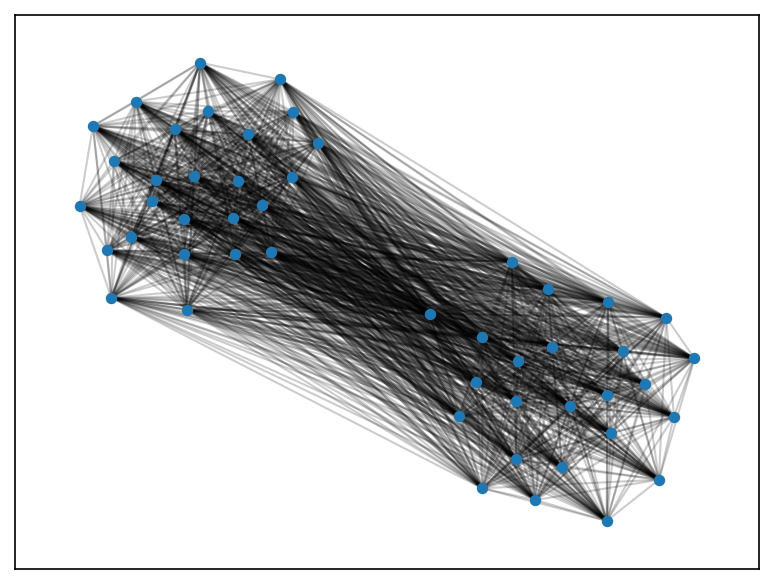

In [54]:
plt.figure(dpi=150)
layout = nx.drawing.layout.spring_layout(ScafH)
#nx.draw(ScafH, pos=layout, node_size=20,alpha=0.25)
nx.draw_networkx_edges(ScafH, pos=layout,alpha=0.2)
nx.draw_networkx_nodes(ScafH, pos=layout,node_size=20)
